In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

- Purchased column is categorical in nature
- Purchased column is going to be the target cariable

In [6]:
df.drop(columns = "User ID", inplace = True)

In [7]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


- The first thing in classification problem is to check for imbalanced dataset
- Here the data at 0 has more observations and 1 has less observations.
- Hence when we divide it into training and testing, it will learn more form 0 and predict values more according to 0 
- Due to this, the accuracy will be on 0's side
- There are 2 ways to balance such an imbalance data:
1) oversampling 2) undersampling
- In oversampling, it will transfer the data from larger classification to smaller classification
- In undersampling, it will remove the data from larger classification to match the quantum with smaller classification

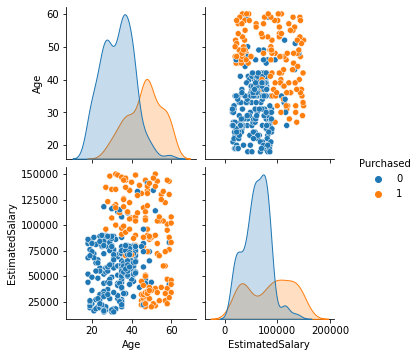

In [8]:
sns.pairplot(df, hue = "Purchased")
plt.show()

- The data is linear since we can divide the data points into classes

In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


- Gender column is of the object type. We are not going to consider Gender in part of training and testing data

In [10]:
x = df.iloc[:, 1:-1]

In [11]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [12]:
y = df['Purchased']

In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

### Splitting the dataset into training and testing 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state= 123)

In [16]:
#model importing
from sklearn.neighbors import KNeighborsClassifier

In [17]:
#creating an instance
knnc = KNeighborsClassifier(n_neighbors = 5)

In [18]:
#training the data
knnc.fit(xtrain, ytrain)

KNeighborsClassifier()

In [19]:
#testing the data
ypred = knnc.predict(xtest)

### Evaluating the model

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
ac1 = accuracy_score(ytest, ypred)
print(ac1)

0.77


### Hyperparameter Tuning to see where we get the maximum accuracy 

In [22]:
ac_list = []
for k in range(1,31,1):
    knncl = KNeighborsClassifier(n_neighbors=k)
    knncl.fit(xtrain, ytrain)
    ypredl = knncl.predict(xtest)
    ac = accuracy_score(ytest, ypredl)
    ac_list.append(ac)

In [23]:
ac_list

[0.74,
 0.74,
 0.75,
 0.71,
 0.77,
 0.73,
 0.73,
 0.74,
 0.74,
 0.75,
 0.74,
 0.74,
 0.73,
 0.75,
 0.74,
 0.74,
 0.76,
 0.75,
 0.73,
 0.75,
 0.75,
 0.76,
 0.75,
 0.74,
 0.73,
 0.74,
 0.73,
 0.74,
 0.74,
 0.74]

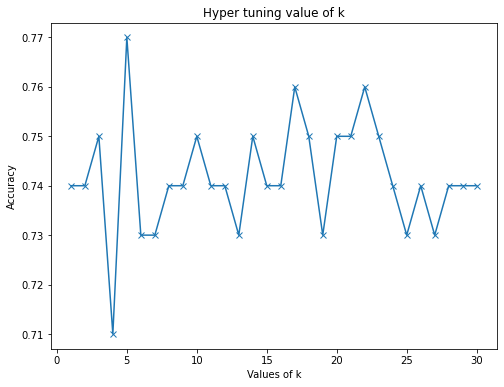

In [24]:
plt.figure(figsize = (8,6))
plt.plot(range(1,31), ac_list, marker = "x")

plt.title("Hyper tuning value of k")
plt.xlabel("Values of k")
plt.ylabel("Accuracy")

plt.show()

In [25]:
knncf = KNeighborsClassifier(n_neighbors=5)
knncf.fit(xtrain, ytrain)
ypredf = knncf.predict(xtest)
accuracy_score(ytest, ypredf)

0.77

### Evaluation of the model

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(ytest, ypredf)

array([[52, 11],
       [12, 25]], dtype=int64)

- TN = 52
- TP = 25
- FN = 11
- FP = 12
- Correct classification = 77
- Misclassification = 23

In [28]:
accuracy = (52+25) / (52+25+11+12)
print(accuracy)

0.77


In [29]:
from sklearn.metrics import classification_report

In [30]:
cr = classification_report(ytest, ypred)

In [31]:
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        63
           1       0.69      0.68      0.68        37

    accuracy                           0.77       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.77      0.77      0.77       100



- f1 score is tending more towards zero and less towards 1 since the dataset is imbalance
- support represents 63% of data belongs to classification 0 and 37 % of data belongs to classification 1
- what should we consider in this case of social network ? FP,FN,TP,TN ?